# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Hossein Pirhosseinloo
2.   Student Number: 400301834


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [63]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset['X'].values[:int(len(dataset) * 0.8)].reshape(-1,1)
y_train = dataset['Y'].values[:int(len(dataset) * 0.8)].reshape(-1,1)

x_test = dataset['X'].values[int(len(dataset) * 0.8):].reshape(-1,1)
y_test = dataset['Y'].values[int(len(dataset) * 0.8):].reshape(-1,1)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [92]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A=np.concatenate((np.ones(x_train.shape), x_train),axis=1)
m = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y_train)[::-1]
print(m)

[[-1.02641738]
 [ 0.81500634]]


In [93]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.3544951192130029


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

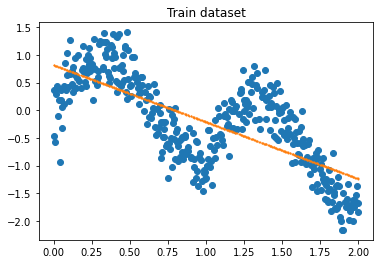

In [94]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

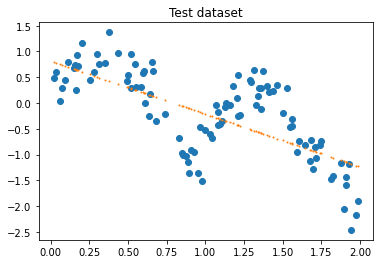

In [95]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

از آنجایی که داده های آموزش و تست واریانس زیادی داره مدل کردن آن با رگرسیون خطی گلوبال نتایج مطلوبی به دست نداده و در هیچ مورد آموزش و تست تخمین مورد نظر نتوانسته به درستی داده ها را دنبال کند و خطای نسبتا زیادی دارد.

خطوط رسم شده برای تست نتوانسته به درستی داده های تست را دنبال کند.

بنابراین نتیجه میگیریم برای این دیتاست که واریانس زیادی دارد استفاده از رگرسیون خطی مناسب نیست.

مشکل اصلی در اینجا واریانس زیاد داده های آموزش و تست است. بنابراین بهتر است از روش های دیگری برای تخمین استفاده کنیم.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

از آنجایی که رگرسیون خطی محلی وزندار بهتر می تواند داده های با واریانس زیاد را تعقیب کند قطعا روش بهتری برای آموزش دادن تخمینگر در این مورد است. در واقع با توجه به تغییرات زیاد داده های آموزش و تست می توان بازه های آن ها را به چند قسمت تقسیم کرده و در هر قسمت که واریانس کمی دارد یک رگرسیون را به عنوان تخمینگر استفاده کنیم.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
$\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}$

In [260]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp((-((xi[1]-the_query_point[0]))*(xi[1]-the_query_point[0]))/(2*hyperparameter*hyperparameter))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
$\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}$
<br><br/>
Of course if you use another form, implement your own.

In [271]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.concatenate((np.ones(x_train.shape), x_train),axis=1)
    qx = np.mat([1, query_x])
    W = get_weight_matrix(query_x, X, hyperparameter)
    theta = np.matmul(np.linalg.inv(np.matmul(np.matmul(X.T,W),X)), np.matmul(np.matmul(X.T,W),train_Y))
    return np.dot(qx, theta).item(0)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [277]:
hyperparameter = 0.01
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

C:\Users\Hossein\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\matrixlib\defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error: 0.0957544740372434


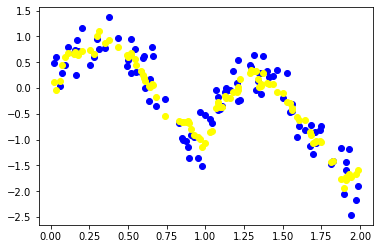

In [278]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

بله کارایی در اینجا به طور قابل توجهی افزایش یافته است. این مورد در مقدار خطا هم مشخص است. همچنین داده های تخمین زده شده بسیار نزدیکتر به داده های تست است. این نشان می دهد که مدل ما واریانس بیشتری پیدا کرده است.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

از آنجایی که روش KNN یک روش محلی محسوب می شود در نتیجه استفاده از آن می تواند واریانس بیشتری نسبت به مدل رگرسیون خطی داشته باشد. اما به صورت کلی نمی توان گفت که در مقابل رگرسیون محلی چه عملکردی دارد و عملکرد آن وابسته به داده های آموزش و تست و همچنین هایپرپارامترهای استفاده شده است.

### Part10:
Implementing the `KNN model`.

In [346]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1-x2)
        return distance

    def return_nn_ids(self, x):
        d = [(self.distance(x[0],val[0]),i) for i, val in enumerate(self.X)]
        d.sort(key=lambda a: a[0])
        indices = [val[1] for i, val in enumerate(d) if i < self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        y_list= self.Y[neareest_indices]
        predicted_y = y_list.mean()
        return predicted_y

In [347]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    # error = ...
    return error, predicted_y

In [348]:
k = 3
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.0957544740372434


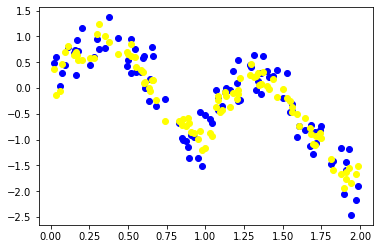

In [349]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

همانطور که گفته شد از آنجایی که این روش محلی است انتظار داریم که رفتار بهتری نسبت به رگرسیون خطی داشته باشد. در تصاویر هم مشخص است که داده های تخمین زده شده تا حد خوبی داده های تست را تخمین زده اند و خطای گزارش شده هم نزدیک به خطار رگرسیون محلی و خیلی کمتر از رگرسیون خطی است.